In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,LabelEncoder
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVC,LinearSVC

In [2]:
cen=pd.read_csv('https://raw.githubusercontent.com/pooja2512/Adult-Census-Income/master/adult.csv')

In [3]:
cen

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


This is the extracted data from the 1994 Census. 
A set of records was extracted using the following conditions:
((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 
The prediction is to determine whether a person makes over $50K a year.

In [4]:
cen.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


this is the first five rows and columns.

In [5]:
cen.shape

(32561, 15)

The data contain 32561 rows and 15 columns.

In [6]:
cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


This info shows the dtype of the data.
there are 6 int64 and 9 object dtype.
and there are no null values.

In [7]:
cen.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

This are the name of all the columns.

In [8]:
cen.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

This shows that there are no null values.

<Axes: >

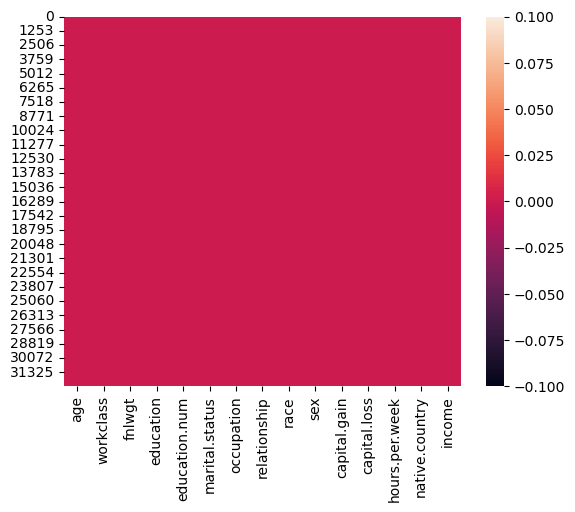

In [9]:
sns.heatmap(cen.isnull())

visualization of null values through heatmap.

In [10]:
cen.nunique().to_frame('No of unique values')

,No of unique values
age,73
workclass,9
fnlwgt,21648
education,16
education.num,16
marital.status,7
occupation,15
relationship,6
race,5
sex,2


This are the unique values of the columns.

<Axes: >

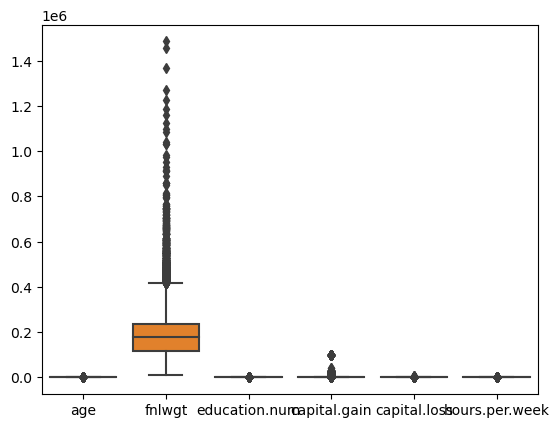

In [11]:
#dropping of duplicates values
cen.drop_duplicates(inplace=True)
sns.boxplot(cen)

In [12]:
cen.duplicated().sum() 

0

We can see that there are no duplicate values.

In [13]:
cen.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#This shows the statistical information of the numericalcolumns.
It has no negative values from the above abservation we can say that-

The count of all columns are same that means it has no missing values. 
The mean value is greater than median(50%) in most of the columns, which means data is skewed to the right.
There is huge difference between the max and 75% so there are outliers present in the data. 
The standard deviation,25% percentile value and min can be notice by this describe method.

In [14]:
#checking the correlation
cen.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education.num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital.gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital.loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours.per.week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


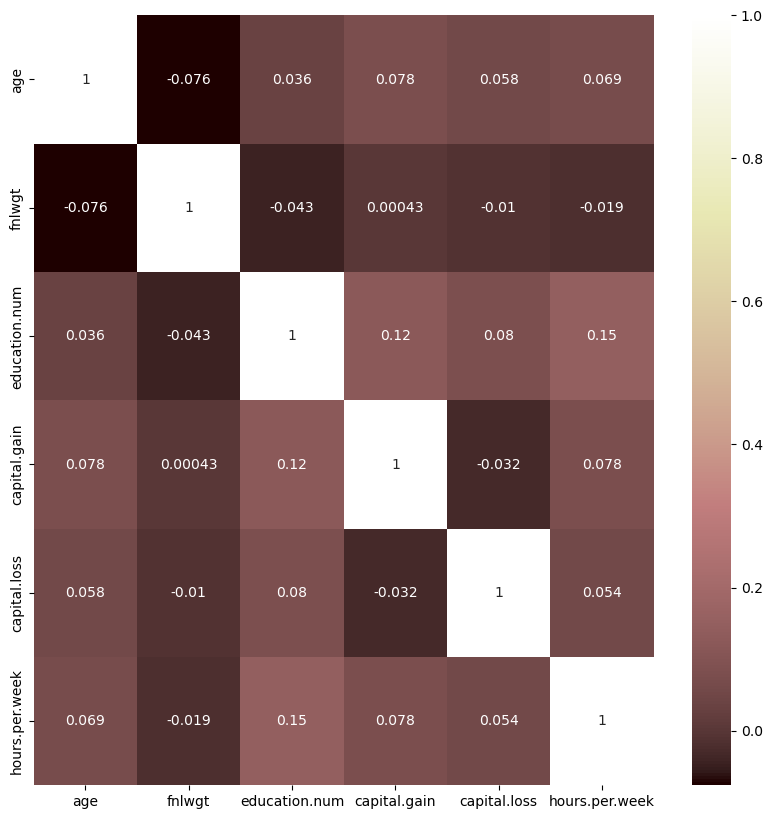

In [15]:
#checking of correlation with the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cen.corr(),cmap='pink',annot=True)
plt.show()

here we can see that age ie negatively correlated with fnlwgt.
education.num is positively correlated with hours.per.week and capital.gain.

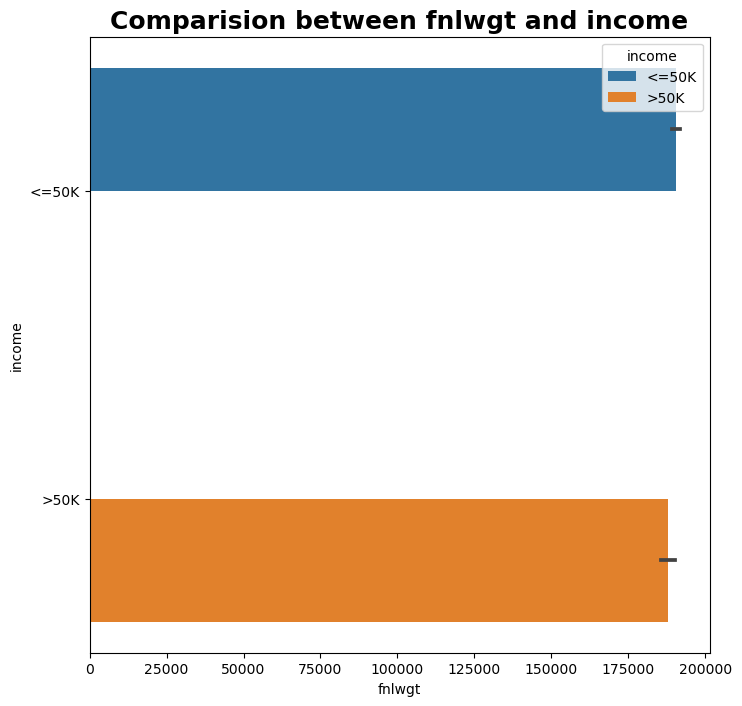

In [16]:
#Lets check the relation between income and  fnlwgt
plt.figure(figsize = (8,8))
y = cen["income"]
p = sns.barplot(x = "fnlwgt", y = "income", data = cen,hue='income')
plt.title('Comparision between fnlwgt and income', fontsize=18, fontweight='bold')
plt.show()

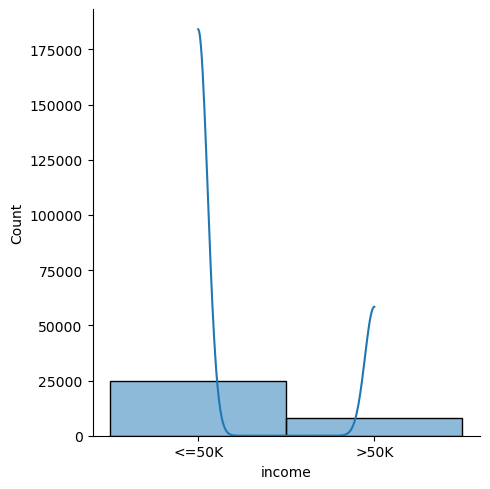

In [17]:
#census income
sns.displot(cen['income'],bins=10,kde=True)

Here we can see that less than or equal to 50k income has the highest count about 25000,
and more than 50 k income count is nearly 10000.

<Axes: xlabel='income', ylabel='count'>

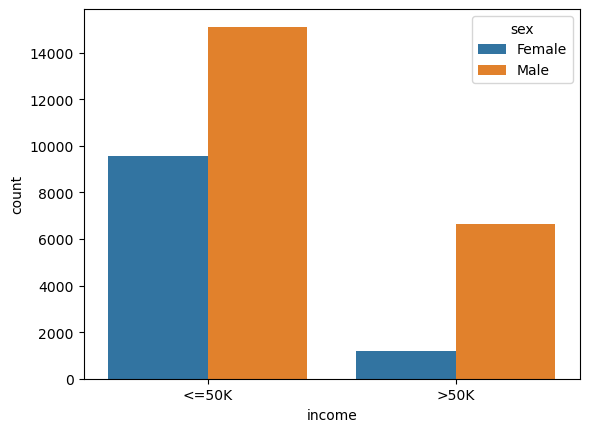

In [18]:
sns.countplot(data=cen,x='income',hue='sex')

Here we can see that blue colum is foe female and orange column is for male.
In both the count of male is highest. Means in less or equal to 50k income the male persentage is more
In greater than 50 k income the male percentage is higher than female.

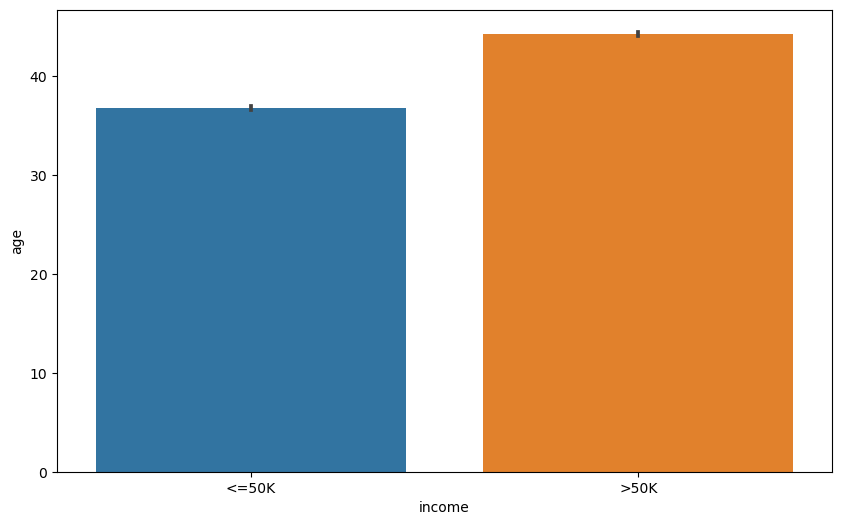

In [19]:
#Lets check the relation between geolocation_source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "income", y = "age", data = cen)
plt.show()

Here we can see that people with age above 40 has income greater than 50k.
And people below 40 age have less or equal to 50 k income.

In [20]:
#converting categorical data into numerical data
enc=OrdinalEncoder()
cen[['education','marital.status','relationship','race','sex','native.country']]=enc.fit_transform(cen[['education','marital.status','relationship','race','sex','native.country']])

In [21]:
#converting the mix data into numerical data
pd.to_numeric(cen['workclass'], errors='coerce').fillna(0)
cen["workclass"] = pd.to_numeric(cen['workclass'], errors='coerce').fillna(0)

In [22]:
#converting the mix data into numerical data
pd.to_numeric(cen['occupation'], errors='coerce').fillna(0)
cen["occupation"] = pd.to_numeric(cen['occupation'], errors='coerce').fillna(0)

In [23]:
cen.sample(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
26740,38,0.0,342635,9.0,13,2.0,0.0,0.0,4.0,1.0,0,0,70,39.0,<=50K
9230,42,0.0,413297,15.0,10,2.0,0.0,0.0,4.0,1.0,0,0,40,39.0,<=50K
6864,53,0.0,279129,15.0,10,2.0,0.0,0.0,4.0,1.0,0,0,30,39.0,<=50K
19421,19,0.0,167859,11.0,9,4.0,0.0,3.0,2.0,1.0,0,0,40,39.0,<=50K
27746,36,0.0,257380,11.0,9,2.0,0.0,0.0,2.0,1.0,0,0,35,39.0,<=50K


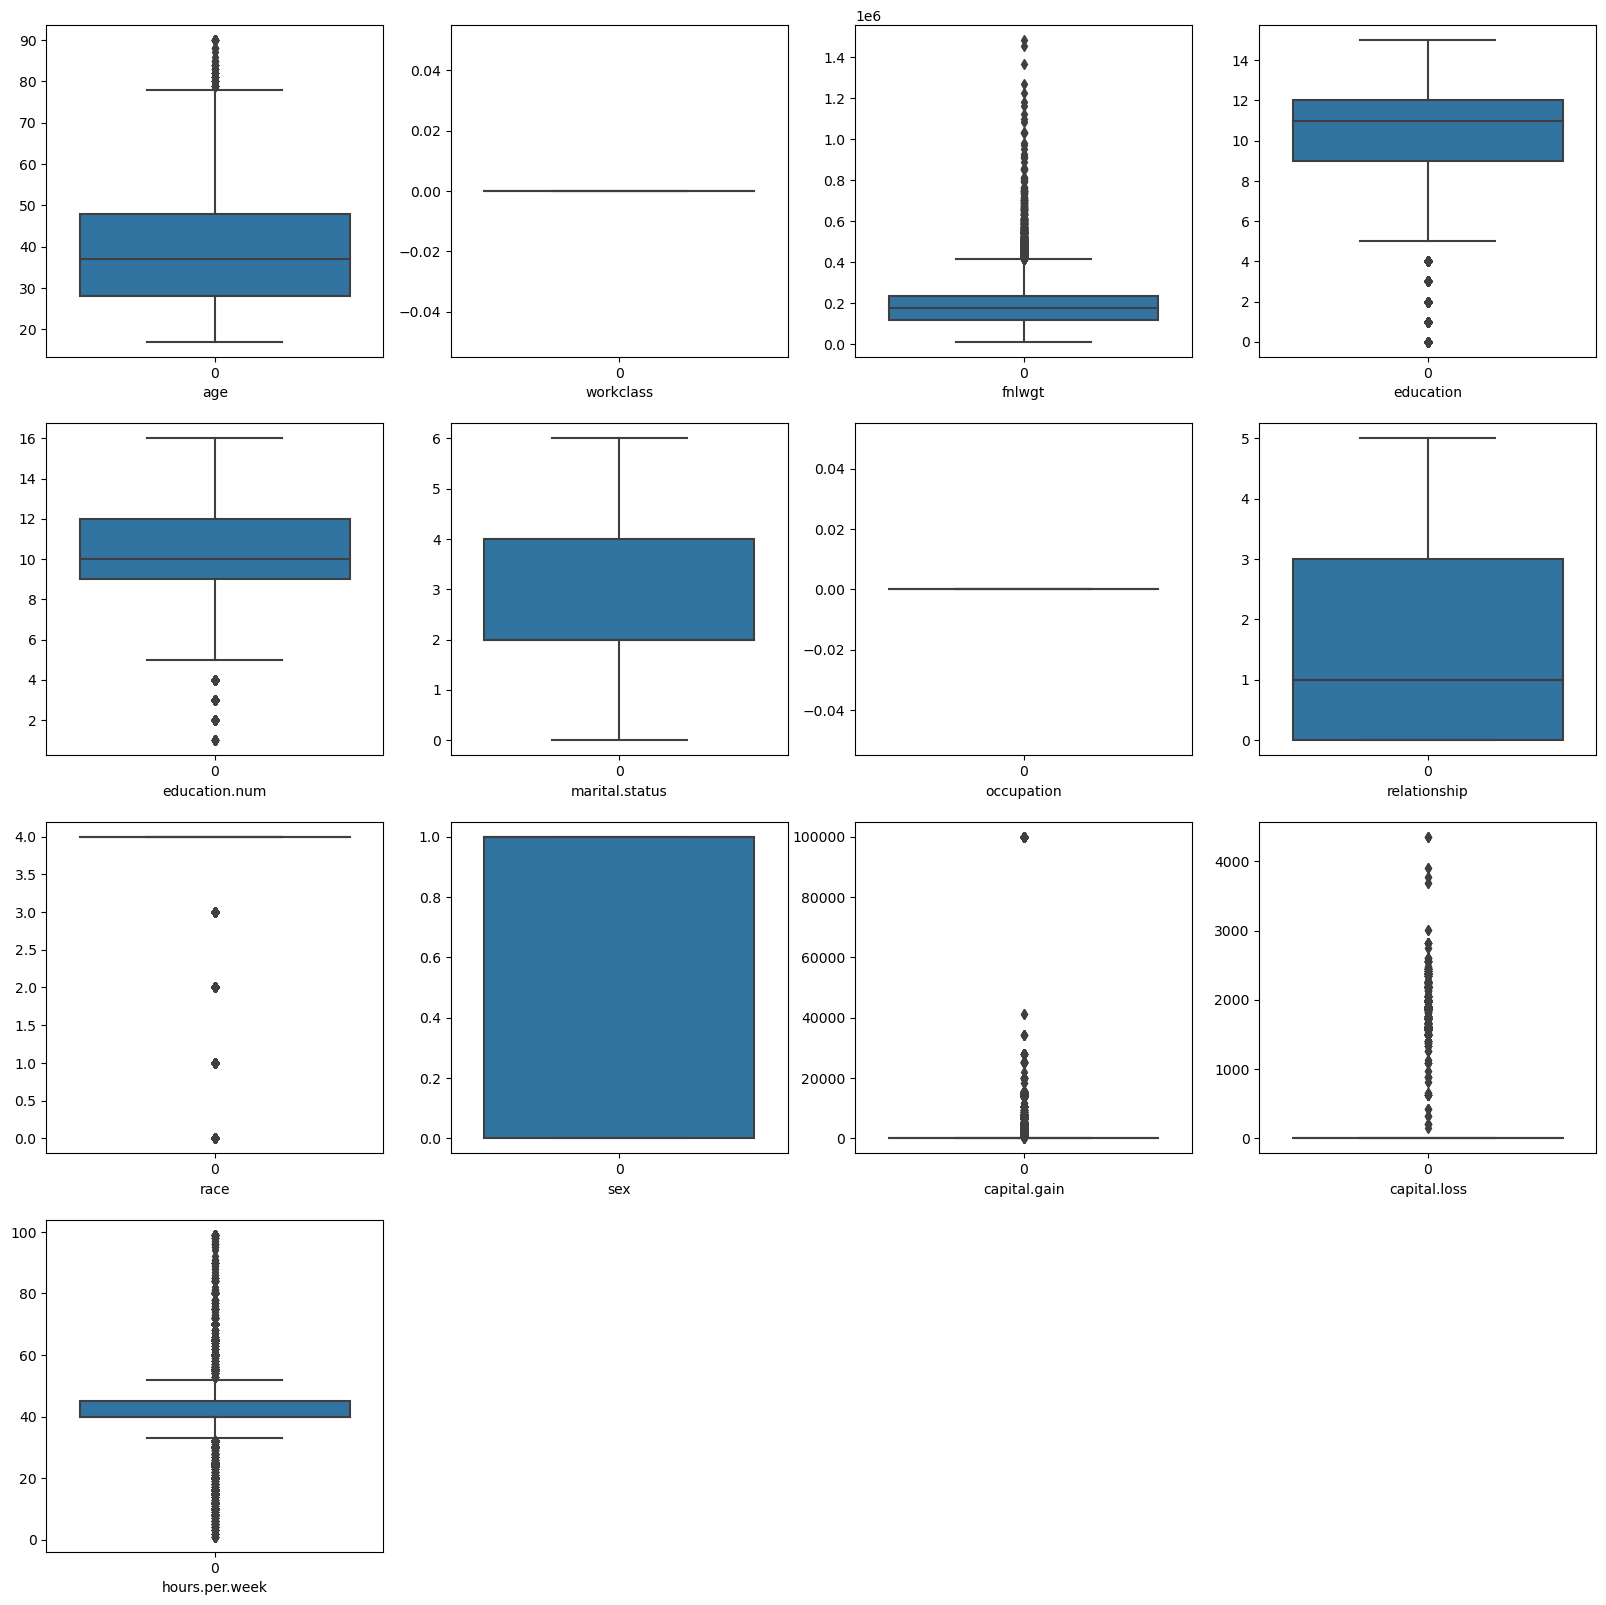

In [24]:
#checking the outliers
plt.figure(figsize=(20,25))
p=1
for i in cen:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(cen[i])
        plt.xlabel(i)
        p+=1
plt.show()  

In [25]:
x=cen.iloc[:,:-1]
y=cen.iloc[:,-1]

In [26]:
#checking skewness
cen.skew()

age                0.557663
workclass          0.000000
fnlwgt             1.447703
education         -0.934160
education.num     -0.309500
marital.status    -0.012753
occupation         0.000000
relationship       0.786548
race              -2.435338
sex               -0.719449
capital.gain      11.949403
capital.loss       4.592702
hours.per.week     0.228759
native.country    -3.661128
dtype: float64

In [27]:
x['capital.gain']=np.cbrt(x['capital.gain'])

In [28]:
x.skew()

age               0.557663
workclass         0.000000
fnlwgt            1.447703
education        -0.934160
education.num    -0.309500
marital.status   -0.012753
occupation        0.000000
relationship      0.786548
race             -2.435338
sex              -0.719449
capital.gain      4.097819
capital.loss      4.592702
hours.per.week    0.228759
native.country   -3.661128
dtype: float64

In [29]:
#seperating independent and target variables
x=cen.drop('income',axis=1)
y=cen['income']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (32537, 14)
label dimension (32537,)


In [30]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[ 3.77000319,  0.        , -1.06795519, ..., 10.5896253 ,
        -0.03566374,  0.29133547],
       [ 3.18339719,  0.        , -0.53915902, ..., 10.5896253 ,
        -1.81751646,  0.29133547],
       [ 2.01018519,  0.        , -0.03524091, ..., 10.5896253 ,
        -0.03566374,  0.29133547],
       ...,
       [ 0.1037157 ,  0.        , -0.33543555, ..., -0.21674317,
        -0.03566374,  0.29133547],
       [ 1.42357919,  0.        , -0.35877886, ..., -0.21674317,
        -0.03566374,  0.29133547],
       [-1.2161478 ,  0.        ,  0.11092955, ..., -0.21674317,
        -1.65552985,  0.29133547]])

# MODEL BUILDING

In [31]:
#importing importand liberies
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso

In [32]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pre=dtc.predict(x_test)
    acc=accuracy_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.818479819709076 at random state 28


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [34]:
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.8179676295841016
[[6542  928]
 [ 849 1443]]
              precision    recall  f1-score   support

       <=50K       0.89      0.88      0.88      7470
        >50K       0.61      0.63      0.62      2292

    accuracy                           0.82      9762
   macro avg       0.75      0.75      0.75      9762
weighted avg       0.82      0.82      0.82      9762



the accuracy score of decision tree is 81.79%

In [35]:
# Random forest classifier
Rc=RandomForestClassifier()
Rc.fit(x_train,y_train)
preRc=Rc.predict(x_test)
print(accuracy_score(y_test,preRc))
print(confusion_matrix(y_test,preRc))
print(classification_report(y_test,preRc))

0.8496209793075189
[[6870  600]
 [ 868 1424]]
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      7470
        >50K       0.70      0.62      0.66      2292

    accuracy                           0.85      9762
   macro avg       0.80      0.77      0.78      9762
weighted avg       0.84      0.85      0.85      9762



the accuracy score of randomforest is 84.96%

In [36]:
#Support vector machine
svc=SVC()
svc.fit(x_train,y_train)
presvc=svc.predict(x_test)
print(accuracy_score(y_test,presvc))
print(confusion_matrix(y_test,presvc))
print(classification_report(y_test,presvc))

0.8526941200573653
[[7049  421]
 [1017 1275]]
              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.91      7470
        >50K       0.75      0.56      0.64      2292

    accuracy                           0.85      9762
   macro avg       0.81      0.75      0.77      9762
weighted avg       0.85      0.85      0.84      9762



the accuracy score of svc is 85.26%

In [37]:
# Extra tree classifier
ex=ExtraTreesClassifier()
ex.fit(x_train,y_train)
preada=ex.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.8359967219832002
[[6769  701]
 [ 900 1392]]
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      7470
        >50K       0.67      0.61      0.63      2292

    accuracy                           0.84      9762
   macro avg       0.77      0.76      0.76      9762
weighted avg       0.83      0.84      0.83      9762



the accuracy score of extra tree is 83.59%

In [38]:
# Logistic regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
prelg=lg.predict(x_test)
print(accuracy_score(y_test,prelg))
print(confusion_matrix(y_test,prelg))
print(classification_report(y_test,prelg))

0.8299528785085023
[[7049  421]
 [1239 1053]]
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      7470
        >50K       0.71      0.46      0.56      2292

    accuracy                           0.83      9762
   macro avg       0.78      0.70      0.73      9762
weighted avg       0.82      0.83      0.82      9762



The accuracy score of logistic regression is 82.99%

# CROSS VALIDATION 

In [39]:
# Cv score for decisiontree
score= cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracu score and cross validation',accuracy_score(y_test,preddtc)-score.mean())

[0.72971727 0.71220037 0.77593361 0.77977563 0.77485785]
0.754496944286466
0.027986215165388444
difference between accuracu score and cross validation 0.06347068529763567


In [40]:
# Cv score for randomforest
score= cross_val_score(Rc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,preRc)-score.mean())

[0.76367548 0.75       0.8029814  0.81112648 0.8069771 ]
0.7869520923474309
0.02509820235714065
difference between accuracy score and corss validation 0.06266888696008799


In [41]:
# Cv score for support vector machine
score= cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,presvc)-score.mean())

[0.74231715 0.82175784 0.81681266 0.82434302 0.81635162]
0.8043164568930496
0.031145399037494362
difference between accuracy score and cross validation 0.04837766316431569


In [42]:
# Cv score for Extatrees classifier
score= cross_val_score(ex,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.76075599 0.75015366 0.80159828 0.80006147 0.802213  ]
0.782956480416485
0.02271474354540459
difference between accuracy score and cross validation 0.05304024156671516


In [43]:
# Cv score for logistic regression
score= cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,prelg)-score.mean())

[0.78964352 0.84280885 0.78899647 0.78699862 0.79314584]
0.80031865829518
0.021337478542511737
difference between accuracy score and corss validation 0.029634220213322293


Logistic Regression is our best model as the difference between accuracy score and cross validation score is least

# SETTING PARAMETERS

In [44]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [45]:
para={'C':[0.8,0.9,1.0],
      'tol':[0.0001],
     'class_weight':[None],
     'max_iter':[100]}
lg_cv=GridSearchCV(svc,para,cv=10)
lg_cv.fit(x_train,y_train)
print(lg_cv.best_params_)

{'C': 0.9, 'class_weight': None, 'max_iter': 100, 'tol': 0.0001}


In [46]:
lg_new=SVC(C=0.9,class_weight=None, max_iter=100,tol=0.0001)
lg_new.fit(x_train,y_train)
y_pred_new=lg_new.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred_new))
print(acc*100)

0.6866420815406679
81.49969268592501


In [47]:
#Saving the model
import joblib
import pickle
filename="Census income.pkl"
pickle.dump(lg_new,open(filename,'wb'))

In [48]:
load_m=pickle.load(open('Census income.pkl','rb'))

In [49]:
#checking the result
result=load_m.score(x_test,y_test)
print(result*100)

68.66420815406678


In [50]:
con=pd.DataFrame([load_m.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,9752,9753,9754,9755,9756,9757,9758,9759,9760,9761
predicted,<=50K,<=50K,>50K,<=50K,<=50K,<=50K,>50K,<=50K,<=50K,<=50K,...,>50K,>50K,<=50K,<=50K,<=50K,<=50K,<=50K,>50K,<=50K,<=50K
orginal,<=50K,>50K,>50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,>50K,...,>50K,<=50K,>50K,<=50K,<=50K,<=50K,<=50K,>50K,<=50K,<=50K
